# Top Earners in Movie Industry

## Table of Contents

<ul>
    <li><a href="#intro">Introduction</a></li>
    <li><a href="#eda">Exploratory Data Analysis</a></li>
    <li><a href="#conclusion">Conclusion</a></li>
</ul>

<a id="#intro"></a>
## Introduction

> This analysis project is to be done using the imdb movie data.

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
df = pd.read_csv('imdb-movies.csv')

###### Inspecting the dataframe

In [3]:
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


###### Finding a shape of dataset

In [4]:
df.shape            # 10866 rows and 21 columns

(10866, 21)

In [5]:
print('Number of rows:', df.shape[0])
print('Number of columns:',df.shape[1])

Number of rows: 10866
Number of columns: 21


###### Information about dataset

In [6]:
df.info()      

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

#### Dropping columns without neccesary information and remove all records with no financial information

In [7]:
df.drop([ 'id','imdb_id','cast', 'homepage', 'tagline', 'keywords', 'release_date', 'overview', 'runtime'], axis=1, inplace=True)
df.columns

Index(['popularity', 'budget', 'revenue', 'original_title', 'director',
       'genres', 'production_companies', 'vote_count', 'vote_average',
       'release_year', 'budget_adj', 'revenue_adj'],
      dtype='object')

In [8]:
df.head(1)

,popularity,budget,revenue,original_title,director,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09


### Data Cleaning

###### Checking for missing values in a dataset

In [9]:
print("Any missing values: ", df.isnull().values.any())

Any missing values:  True


In [10]:
df.isnull().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
director                  44
genres                    23
production_companies    1030
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

<AxesSubplot:>

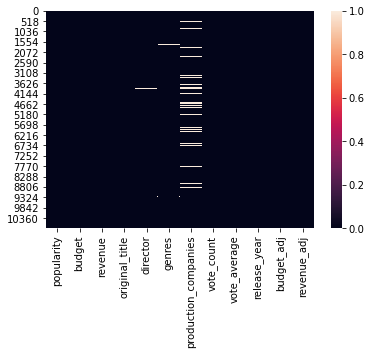

In [11]:
# visualising empty values with seaborn
sns.heatmap(df.isnull())

In [12]:
df.isnull().sum(axis=1).sort_values(ascending=False)

2376     3
8234     2
2290     2
4939     2
2401     2
        ..
3813     0
3814     0
3815     0
3819     0
10865    0
Length: 10866, dtype: int64

In [13]:
round(df.isnull().sum(axis=1).sort_values(ascending=False)/len(df)*100, 2)

2376     0.03
8234     0.02
2290     0.02
4939     0.02
2401     0.02
         ... 
3813     0.00
3814     0.00
3815     0.00
3819     0.00
10865    0.00
Length: 10866, dtype: float64

In [14]:
df.notnull().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   popularity            10866 non-null  bool 
 1   budget                10866 non-null  bool 
 2   revenue               10866 non-null  bool 
 3   original_title        10866 non-null  bool 
 4   director              10866 non-null  bool 
 5   genres                10866 non-null  bool 
 6   production_companies  10866 non-null  bool 
 7   vote_count            10866 non-null  bool 
 8   vote_average          10866 non-null  bool 
 9   release_year          10866 non-null  bool 
 10  budget_adj            10866 non-null  bool 
 11  revenue_adj           10866 non-null  bool 
dtypes: bool(12)
memory usage: 127.5 KB


###### Dropping all the missing values

In [15]:
df.dropna(axis=0, inplace = True)          # axis=0 for sdopping rows, axis=1 for dropping columns
df

,popularity,budget,revenue,original_title,director,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,James Wan,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...
10861,0.080598,0,0,The Endless Summer,Bruce Brown,Documentary,Bruce Brown Films,11,7.4,1966,0.000000e+00,0.000000e+00
10862,0.065543,0,0,Grand Prix,John Frankenheimer,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,20,5.7,1966,0.000000e+00,0.000000e+00
10863,0.065141,0,0,Beregis Avtomobilya,Eldar Ryazanov,Mystery|Comedy,Mosfilm,11,6.5,1966,0.000000e+00,0.000000e+00
10864,0.064317,0,0,"What's Up, Tiger Lily?",Woody Allen,Action|Comedy,Benedict Pictures Corp.,22,5.4,1966,0.000000e+00,0.000000e+00


###### Checking for duplicating values

In [16]:
df.duplicated().any()

True

In [17]:
df.duplicated().sum()

1

###### Dropping duplicates

In [18]:
df.drop_duplicates(subset = None, keep='first', inplace=True)

In [19]:
print("Are there any duplicate values? ", df.duplicated().any())

Are there any duplicate values?  False


###### Statistics about data

In [20]:
df.describe()    # stats for numerical colummns

,popularity,budget,revenue,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,9806.000000,9.806000e+03,9.806000e+03,9806.000000,9806.000000,9806.000000,9.806000e+03,9.806000e+03
mean,0.693143,1.612525e+07,4.407785e+07,238.622578,5.966459,2000.890271,1.935070e+07,5.685528e+07
std,1.035525,3.216819e+07,1.224038e+08,602.081472,0.914291,13.032372,3.562179e+07,1.512243e+08
min,0.000188,0.000000e+00,0.000000e+00,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.231581,0.000000e+00,0.000000e+00,18.000000,5.400000,1994.000000,0.000000e+00,0.000000e+00
50%,0.418756,1.403930e+05,0.000000e+00,46.000000,6.000000,2005.000000,2.410618e+05,0.000000e+00
75%,0.774231,1.900000e+07,3.064621e+07,172.000000,6.600000,2011.000000,2.439107e+07,4.255193e+07
max,32.985763,4.250000e+08,2.781506e+09,9767.000000,8.700000,2015.000000,4.250000e+08,2.827124e+09


###### Statistics about numerical and categorical

In [21]:
df.describe(include='all')

,popularity,budget,revenue,original_title,director,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,9806.000000,9.806000e+03,9.806000e+03,9806,9806,9806,9806,9806.000000,9806.000000,9806.000000,9.806000e+03,9.806000e+03
unique,NaN,NaN,NaN,9546,4521,1921,7423,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Hamlet,Woody Allen,Drama,Paramount Pictures,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,4,42,638,156,NaN,NaN,NaN,NaN,NaN
mean,0.693143,1.612525e+07,4.407785e+07,NaN,NaN,NaN,NaN,238.622578,5.966459,2000.890271,1.935070e+07,5.685528e+07
std,1.035525,3.216819e+07,1.224038e+08,NaN,NaN,NaN,NaN,602.081472,0.914291,13.032372,3.562179e+07,1.512243e+08
min,0.000188,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.231581,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,18.000000,5.400000,1994.000000,0.000000e+00,0.000000e+00
50%,0.418756,1.403930e+05,0.000000e+00,NaN,NaN,NaN,NaN,46.000000,6.000000,2005.000000,2.410618e+05,0.000000e+00
75%,0.774231,1.900000e+07,3.064621e+07,NaN,NaN,NaN,NaN,172.000000,6.600000,2011.000000,2.439107e+07,4.255193e+07


###### Changing  floats to two decimal places

In [22]:
#float with 2 digits
pd.options.display.float_format = "{:,.2f}".format

In [23]:
df.head(3)

,popularity,budget,revenue,original_title,director,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.99,150000000,1513528810,Jurassic World,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.50,2015,"137,999,939.28","1,392,445,892.52"
1,28.42,150000000,378436354,Mad Max: Fury Road,George Miller,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.10,2015,"137,999,939.28","348,161,292.49"
2,13.11,110000000,295238201,Insurgent,Robert Schwentke,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.30,2015,"101,199,955.47","271,619,025.41"


In [24]:
# Delete all records with null, or empty values
# replacing 0.00 values with NaN
df= df.replace (0.00, np.nan)

In [25]:
# check for the result
df.tail(3)

,popularity,budget,revenue,original_title,director,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
10863,0.07,NaN,NaN,Beregis Avtomobilya,Eldar Ryazanov,Mystery|Comedy,Mosfilm,11,6.50,1966,NaN,NaN
10864,0.06,NaN,NaN,"What's Up, Tiger Lily?",Woody Allen,Action|Comedy,Benedict Pictures Corp.,22,5.40,1966,NaN,NaN
10865,0.04,"19,000.00",NaN,Manos: The Hands of Fate,Harold P. Warren,Horror,Norm-Iris,15,1.50,1966,"127,642.28",NaN


In [26]:
# deleting values with NaN
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

In [27]:
# check for the result
df.tail(3)

,popularity,budget,revenue,original_title,director,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
10829,0.40,"4,653,000.00","6,000,000.00",El Dorado,Howard Hawks,Action|Western,Paramount Pictures|Laurel Productions,36,6.90,1966,"31,258,922.36","40,308,088.15"
10835,0.30,"12,000,000.00","20,000,000.00",The Sand Pebbles,Robert Wise,Action|Adventure|Drama|War|Romance,Twentieth Century Fox Film Corporation|Solar P...,28,7.00,1966,"80,616,176.31","134,360,293.85"
10848,0.21,"5,115,000.00","12,000,000.00",Fantastic Voyage,Richard Fleischer,Adventure|Science Fiction,Twentieth Century Fox Film Corporation,42,6.70,1966,"34,362,645.15","80,616,176.31"


In [28]:
print("Any missing values: ", df.isnull().values.any())

Any missing values:  False


<AxesSubplot:>

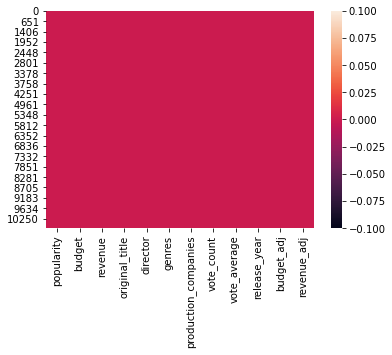

In [29]:
sns.heatmap(df.isnull())

In [30]:
df.describe(include='all')

,popularity,budget,revenue,original_title,director,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,"3,807.00","3,807.00","3,807.00",3807,3807,3807,3807,"3,807.00","3,807.00","3,807.00","3,807.00","3,807.00"
unique,NaN,NaN,NaN,3762,1685,1044,3007,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Halloween,Steven Spielberg,Drama,Paramount Pictures,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,2,27,243,77,NaN,NaN,NaN,NaN,NaN
mean,1.20,"37,589,028.87","108,916,148.11",NaN,NaN,NaN,NaN,533.89,6.17,"2,001.23","44,697,228.80","138,643,066.10"
std,1.48,"42,318,773.53","177,268,589.72",NaN,NaN,NaN,NaN,883.61,0.79,11.33,"44,885,963.54","216,963,576.78"
min,0.01,1.00,2.00,NaN,NaN,NaN,NaN,10.00,2.20,"1,960.00",0.97,2.37
25%,0.47,"10,000,000.00","14,257,950.00",NaN,NaN,NaN,NaN,74.00,5.70,"1,995.00","13,546,369.28","19,199,698.82"
50%,0.81,"25,000,000.00","46,201,432.00",NaN,NaN,NaN,NaN,208.00,6.20,"2,004.00","30,383,599.01","62,822,465.74"
75%,1.39,"50,000,000.00","126,055,415.50",NaN,NaN,NaN,NaN,584.00,6.70,"2,010.00","60,828,254.78","165,649,291.94"


In [31]:
# deleting values with NaN
df=df.dropna()

In [32]:
df.describe()

,popularity,budget,revenue,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,"3,807.00","3,807.00","3,807.00","3,807.00","3,807.00","3,807.00","3,807.00","3,807.00"
mean,1.20,"37,589,028.87","108,916,148.11",533.89,6.17,"2,001.23","44,697,228.80","138,643,066.10"
std,1.48,"42,318,773.53","177,268,589.72",883.61,0.79,11.33,"44,885,963.54","216,963,576.78"
min,0.01,1.00,2.00,10.00,2.20,"1,960.00",0.97,2.37
25%,0.47,"10,000,000.00","14,257,950.00",74.00,5.70,"1,995.00","13,546,369.28","19,199,698.82"
50%,0.81,"25,000,000.00","46,201,432.00",208.00,6.20,"2,004.00","30,383,599.01","62,822,465.74"
75%,1.39,"50,000,000.00","126,055,415.50",584.00,6.70,"2,010.00","60,828,254.78","165,649,291.94"
max,32.99,"425,000,000.00","2,781,505,847.00","9,767.00",8.40,"2,015.00","425,000,000.00","2,827,123,750.41"


In [35]:
df.tail(3)

,popularity,budget,revenue,original_title,director,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
10829,0.40,"4,653,000.00","6,000,000.00",El Dorado,Howard Hawks,Action|Western,Paramount Pictures|Laurel Productions,36,6.90,1966,"31,258,922.36","40,308,088.15"
10835,0.30,"12,000,000.00","20,000,000.00",The Sand Pebbles,Robert Wise,Action|Adventure|Drama|War|Romance,Twentieth Century Fox Film Corporation|Solar P...,28,7.00,1966,"80,616,176.31","134,360,293.85"
10848,0.21,"5,115,000.00","12,000,000.00",Fantastic Voyage,Richard Fleischer,Adventure|Science Fiction,Twentieth Century Fox Film Corporation,42,6.70,1966,"34,362,645.15","80,616,176.31"


In [36]:
# saving decently cleaned data
df.to_csv('imdb-movies_01.csv',index = False)

In [37]:
df=pd.read_csv('imdb-movies_01.csv')

In [38]:
df.describe()

,popularity,budget,revenue,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,"3,807.00","3,807.00","3,807.00","3,807.00","3,807.00","3,807.00","3,807.00","3,807.00"
mean,1.20,"37,589,028.87","108,916,148.11",533.89,6.17,"2,001.23","44,697,228.80","138,643,066.10"
std,1.48,"42,318,773.53","177,268,589.72",883.61,0.79,11.33,"44,885,963.54","216,963,576.78"
min,0.01,1.00,2.00,10.00,2.20,"1,960.00",0.97,2.37
25%,0.47,"10,000,000.00","14,257,950.00",74.00,5.70,"1,995.00","13,546,369.28","19,199,698.82"
50%,0.81,"25,000,000.00","46,201,432.00",208.00,6.20,"2,004.00","30,383,599.01","62,822,465.74"
75%,1.39,"50,000,000.00","126,055,415.50",584.00,6.70,"2,010.00","60,828,254.78","165,649,291.94"
max,32.99,"425,000,000.00","2,781,505,847.00","9,767.00",8.40,"2,015.00","425,000,000.00","2,827,123,750.41"


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3807 entries, 0 to 3806
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            3807 non-null   float64
 1   budget                3807 non-null   float64
 2   revenue               3807 non-null   float64
 3   original_title        3807 non-null   object 
 4   director              3807 non-null   object 
 5   genres                3807 non-null   object 
 6   production_companies  3807 non-null   object 
 7   vote_count            3807 non-null   int64  
 8   vote_average          3807 non-null   float64
 9   release_year          3807 non-null   int64  
 10  budget_adj            3807 non-null   float64
 11  revenue_adj           3807 non-null   float64
dtypes: float64(6), int64(2), object(4)
memory usage: 357.0+ KB


In [40]:
df


,popularity,budget,revenue,original_title,director,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.99,"150,000,000.00","1,513,528,810.00",Jurassic World,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.50,2015,"137,999,939.28","1,392,445,892.52"
1,28.42,"150,000,000.00","378,436,354.00",Mad Max: Fury Road,George Miller,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.10,2015,"137,999,939.28","348,161,292.49"
2,13.11,"110,000,000.00","295,238,201.00",Insurgent,Robert Schwentke,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.30,2015,"101,199,955.47","271,619,025.41"
3,11.17,"200,000,000.00","2,068,178,225.00",Star Wars: The Force Awakens,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.50,2015,"183,999,919.04","1,902,723,129.80"
4,9.34,"190,000,000.00","1,506,249,360.00",Furious 7,James Wan,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.30,2015,"174,799,923.09","1,385,748,801.47"
...,...,...,...,...,...,...,...,...,...,...,...,...
3802,0.67,"7,500,000.00","33,736,689.00",Who's Afraid of Virginia Woolf?,Mike Nichols,Drama,Chenault Productions,74,7.50,1966,"50,385,110.19","226,643,572.37"
3803,0.40,"3,000,000.00","13,000,000.00",Torn Curtain,Alfred Hitchcock,Mystery|Thriller,Universal Pictures,46,6.30,1966,"20,154,044.08","87,334,191.00"
3804,0.40,"4,653,000.00","6,000,000.00",El Dorado,Howard Hawks,Action|Western,Paramount Pictures|Laurel Productions,36,6.90,1966,"31,258,922.36","40,308,088.15"
3805,0.30,"12,000,000.00","20,000,000.00",The Sand Pebbles,Robert Wise,Action|Adventure|Drama|War|Romance,Twentieth Century Fox Film Corporation|Solar P...,28,7.00,1966,"80,616,176.31","134,360,293.85"


<a id="eda"></a>
## Exploratory Data Analysis

> Use Matplotlib to display your data analysis

In [41]:
len(df)

3807

In [42]:
df.popularity.describe()

count   3,807.00
mean        1.20
std         1.48
min         0.01
25%         0.47
50%         0.81
75%         1.39
max        32.99
Name: popularity, dtype: float64

### Who are the top 5 grossing directors?

In [43]:
df['($) billions'] = '$' + (df['revenue_adj'].astype(float)/1000000000).round(2).astype(str)
df.head(2)

,popularity,budget,revenue,original_title,director,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,($) billions
0,32.99,"150,000,000.00","1,513,528,810.00",Jurassic World,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.50,2015,"137,999,939.28","1,392,445,892.52",$1.39
1,28.42,"150,000,000.00","378,436,354.00",Mad Max: Fury Road,George Miller,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.10,2015,"137,999,939.28","348,161,292.49",$0.35


In [47]:
top_directors = df.groupby('director').revenue_adj.sum().nlargest(5)

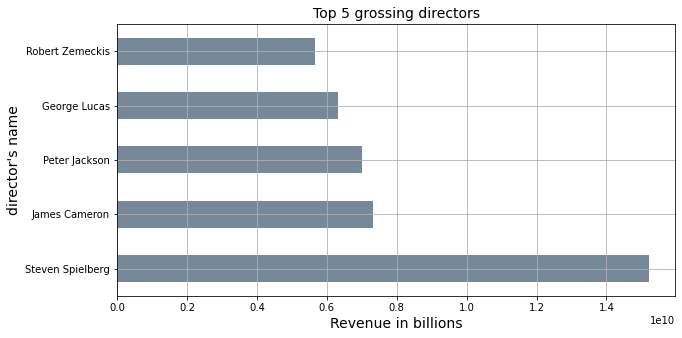

In [49]:
top_directors.plot.barh(figsize=(10,5), grid = True, color = 'lightslategray');
plt.title ('Top 5 grossing directors',fontsize = 14)
plt.ylabel("director's name" ,fontsize = 14)
plt.xlabel('Revenue in billions',fontsize = 14);
plt.show();

### Compare the revenue of the highest grossing movies of all time.

In [50]:
 df.groupby('original_title').revenue_adj.sum().nlargest(10)

original_title
Avatar                           2,827,123,750.41
Star Wars                        2,789,712,242.28
Titanic                          2,506,405,735.42
The Exorcist                     2,167,324,901.20
Jaws                             1,907,005,841.92
Star Wars: The Force Awakens     1,902,723,129.80
E.T. the Extra-Terrestrial       1,791,694,309.25
The Net                          1,583,049,536.35
One Hundred and One Dalmatians   1,574,814,739.70
The Avengers                     1,508,100,207.72
Name: revenue_adj, dtype: float64

In [51]:
# changing revenue adj values to a decimal data
df['($) billions'] = '$' + (df['revenue_adj'].astype(float)/1000000000).round(2).astype(str)
df.head(2)

,popularity,budget,revenue,original_title,director,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,($) billions
0,32.99,"150,000,000.00","1,513,528,810.00",Jurassic World,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.50,2015,"137,999,939.28","1,392,445,892.52",$1.39
1,28.42,"150,000,000.00","378,436,354.00",Mad Max: Fury Road,George Miller,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.10,2015,"137,999,939.28","348,161,292.49",$0.35


In [52]:
highest_grossing_movies = df.groupby('original_title').revenue_adj.sum().nlargest(10)

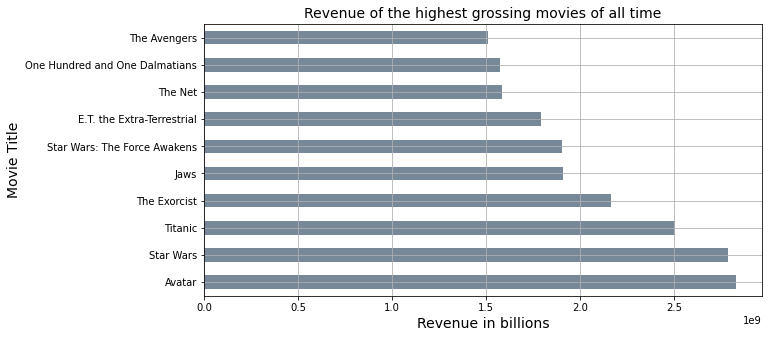

In [53]:
highest_grossing_movies.plot.barh(figsize=(10,5), grid = True, color = 'lightslategray');
plt.title ('Revenue of the highest grossing movies of all time',fontsize = 14)
plt.ylabel('Movie Title',fontsize = 14);
plt.xlabel('Revenue in billions',fontsize = 14);

plt.show();

### IMDb top 5

In [54]:
IMDb_Top_5 = df[df['vote_count']>50].sort_values(by='vote_average', ascending =False)

In [55]:
IMDb_Top_5['rank'] = IMDb_Top_5['vote_average'].rank(method='first',ascending =False)
IMDb_Top_5.head(5)

,popularity,budget,revenue,original_title,director,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,($) billions,rank
1409,7.19,"25,000,000.00","28,341,469.00",The Shawshank Redemption,Frank Darabont,Drama|Crime,Castle Rock Entertainment,5754,8.40,1994,"36,777,789.04","41,693,462.72",$0.04,1.00
2526,5.74,"6,000,000.00","245,066,411.00",The Godfather,Francis Ford Coppola,Drama|Crime,Paramount Pictures|Alfran Productions,3970,8.30,1972,"31,287,365.59","1,277,913,732.39",$1.28,2.00
181,4.78,"3,300,000.00","13,993,093.00",Whiplash,Damien Chazelle,Drama|Music,Bold Films|Blumhouse Productions|Right of Way ...,2372,8.20,2014,"3,039,600.47","12,888,912.73",$0.01,3.00
691,8.95,"63,000,000.00","100,853,753.00",Fight Club,David Fincher,Drama,Regency Enterprises|Fox 2000 Pictures|Taurus F...,5923,8.10,1999,"82,470,329.34","132,022,892.45",$0.13,4.00
925,8.47,"185,000,000.00","1,001,921,825.00",The Dark Knight,Christopher Nolan,Drama|Action|Crime|Thriller,DC Comics|Legendary Pictures|Warner Bros.|Syncopy,8432,8.10,2008,"187,365,527.25","1,014,733,032.48",$1.01,5.00


### Most popular combo genres

In [56]:
genre_df = df.genres.str.split('|', expand =True).iloc[:,0:2]
genre_df.columns = ['genre_1', 'genre_2']
genre_df.genre_2.fillna(genre_df.genre_1, inplace = True)
genre_df

,genre_1,genre_2
0,Action,Adventure
1,Action,Adventure
2,Adventure,Science Fiction
3,Action,Adventure
4,Action,Crime
...,...,...
3802,Drama,Drama
3803,Mystery,Thriller
3804,Action,Western
3805,Action,Adventure


In [57]:
top_genres = pd.concat([df, genre_df], axis=1)
top_genres

,popularity,budget,revenue,original_title,director,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,($) billions,genre_1,genre_2
0,32.99,"150,000,000.00","1,513,528,810.00",Jurassic World,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.50,2015,"137,999,939.28","1,392,445,892.52",$1.39,Action,Adventure
1,28.42,"150,000,000.00","378,436,354.00",Mad Max: Fury Road,George Miller,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.10,2015,"137,999,939.28","348,161,292.49",$0.35,Action,Adventure
2,13.11,"110,000,000.00","295,238,201.00",Insurgent,Robert Schwentke,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.30,2015,"101,199,955.47","271,619,025.41",$0.27,Adventure,Science Fiction
3,11.17,"200,000,000.00","2,068,178,225.00",Star Wars: The Force Awakens,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.50,2015,"183,999,919.04","1,902,723,129.80",$1.9,Action,Adventure
4,9.34,"190,000,000.00","1,506,249,360.00",Furious 7,James Wan,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.30,2015,"174,799,923.09","1,385,748,801.47",$1.39,Action,Crime
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3802,0.67,"7,500,000.00","33,736,689.00",Who's Afraid of Virginia Woolf?,Mike Nichols,Drama,Chenault Productions,74,7.50,1966,"50,385,110.19","226,643,572.37",$0.23,Drama,Drama
3803,0.40,"3,000,000.00","13,000,000.00",Torn Curtain,Alfred Hitchcock,Mystery|Thriller,Universal Pictures,46,6.30,1966,"20,154,044.08","87,334,191.00",$0.09,Mystery,Thriller
3804,0.40,"4,653,000.00","6,000,000.00",El Dorado,Howard Hawks,Action|Western,Paramount Pictures|Laurel Productions,36,6.90,1966,"31,258,922.36","40,308,088.15",$0.04,Action,Western
3805,0.30,"12,000,000.00","20,000,000.00",The Sand Pebbles,Robert Wise,Action|Adventure|Drama|War|Romance,Twentieth Century Fox Film Corporation|Solar P...,28,7.00,1966,"80,616,176.31","134,360,293.85",$0.13,Action,Adventure


In [58]:
top_genres.groupby(['genre_1','genre_2']).revenue_adj.mean().sort_values(ascending=False).head(5)

genre_1          genre_2  
Science Fiction  Adventure   589,458,235.73
History          Romance     553,210,255.54
Comedy           Western     528,462,924.68
Family           Animation   441,377,487.35
Romance          Family      437,799,350.39
Name: revenue_adj, dtype: float64

### In which year there was the highest average votes?

In [59]:
df.groupby('release_year').vote_count.sum().nlargest(1)

release_year
2013    182589
Name: vote_count, dtype: int64

In [60]:
average_voting = df.groupby('release_year').vote_count.sum().nlargest(10)
average_voting

release_year
2013    182589
2014    169922
2012    160618
2015    155369
2011    121103
2010    115436
2009    103154
2008     87592
2007     76540
2004     72472
Name: vote_count, dtype: int64

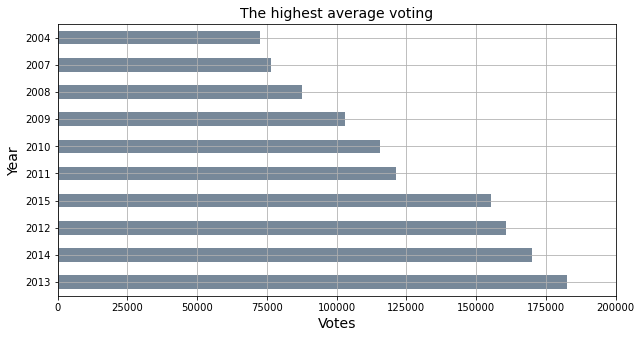

In [61]:
average_voting.plot.barh(figsize=(10,5), grid = True,color = 'lightslategray');
plt.title ('The highest average voting',fontsize = 14)
plt.ylabel('Year',fontsize = 14);
plt.xlabel('Votes',fontsize = 14);
plt.xticks(ticks=[i*25000 for i in range(9)])
plt.show();

### Average Rating for Each Director

In [62]:
df.columns

Index(['popularity', 'budget', 'revenue', 'original_title', 'director',
       'genres', 'production_companies', 'vote_count', 'vote_average',
       'release_year', 'budget_adj', 'revenue_adj', '($) billions'],
      dtype='object')

In [63]:
average_vote=df.groupby('director').vote_average.mean().nlargest(10)

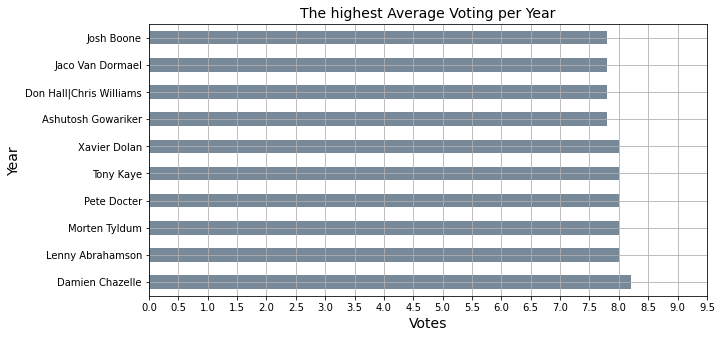

In [64]:
average_vote.plot.barh(figsize=(10,5), grid = True,color = 'lightslategray');
plt.title ('The highest Average Voting per Year',fontsize = 14)
plt.ylabel('Year',fontsize = 14);
plt.xlabel('Votes',fontsize = 14);
plt.xticks(ticks=[i*.5 for i in range(20)])
plt.show();

### Top 5 Highest Rated Movie Titles and its Directors?

In [65]:
top5 = df.nlargest(5, 'vote_average')[['original_title',  'vote_average', 'director']].set_index('original_title')
top5

,vote_average,director
original_title,,
The Shawshank Redemption,8.40,Frank Darabont
Stop Making Sense,8.40,Jonathan Demme
The Godfather,8.30,Francis Ford Coppola
Whiplash,8.20,Damien Chazelle
Fight Club,8.10,David Fincher


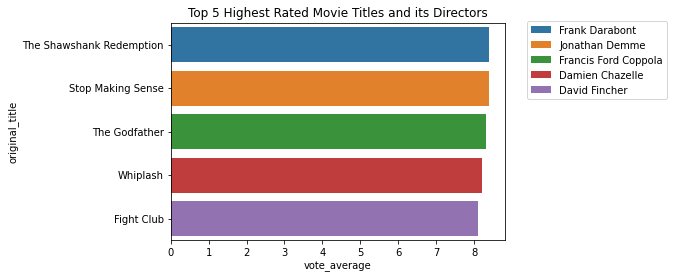

In [66]:
sns.barplot(x='vote_average', y=top5.index, data=top5, hue='director', dodge=False)
plt.title('Top 5 Highest Rated Movie Titles and its Directors')
plt.legend(bbox_to_anchor=(1.05,1.03), loc=2)
plt.show()

### Adding a Gross Revenue Column and Saving to a New DataFrame

In [68]:
gross_df = df
gross_df.columns

Index(['popularity', 'budget', 'revenue', 'original_title', 'director',
       'genres', 'production_companies', 'vote_count', 'vote_average',
       'release_year', 'budget_adj', 'revenue_adj', '($) billions'],
      dtype='object')

In [69]:
df["gross"] = df['revenue_adj']-df['budget_adj']

In [70]:
df.columns

Index(['popularity', 'budget', 'revenue', 'original_title', 'director',
       'genres', 'production_companies', 'vote_count', 'vote_average',
       'release_year', 'budget_adj', 'revenue_adj', '($) billions', 'gross'],
      dtype='object')

In [71]:
df.to_csv('imdb-movies_02.csv',index = False)

In [72]:
df = pd.read_csv('imdb-movies_02.csv')

### Top 10 Highest Gross Revenue Movie Titles

In [90]:
gross_revenue_movies= df.nlargest(10, 'gross')[['original_title', 'gross']]
gross_revenue_movies.set_index('original_title')

,gross
original_title,
Star Wars,"2,750,136,650.92"
Avatar,"2,586,236,847.52"
Titanic,"2,234,713,671.21"
The Exorcist,"2,128,035,624.57"
Jaws,"1,878,643,093.71"
E.T. the Extra-Terrestrial,"1,767,968,064.02"
Star Wars: The Force Awakens,"1,718,723,210.76"
The Net,"1,551,568,265.28"
One Hundred and One Dalmatians,"1,545,635,294.87"


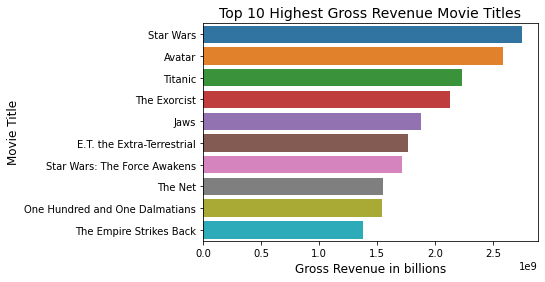

In [99]:
sns.barplot(x='gross', y='original_title', data =gross_revenue_movies)
plt.title ('Top 10 Highest Gross Revenue Movie Titles',fontsize = 14)
plt.ylabel('Movie Title',fontsize = 12);
plt.xlabel('Gross Revenue in billions',fontsize = 12);
plt.show()

### Does Rating Affect the Gross Revenue?

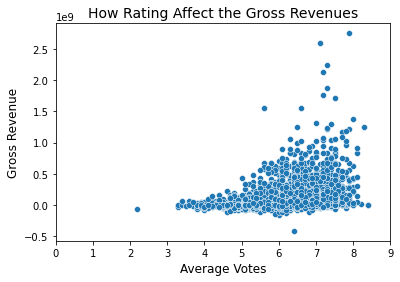

In [116]:
sns.scatterplot(x='vote_average', y = 'gross', data= df)
plt.title ('How Rating Affect the Gross Revenues',fontsize = 14)
plt.ylabel('Gross Revenue',fontsize = 12);
plt.xlabel('Average Votes',fontsize = 12);
plt.xticks(ticks=[i*1 for i in range(10)])

plt.show()

In [118]:
df.corr(method='pearson')

,popularity,budget,revenue,vote_count,vote_average,release_year,budget_adj,revenue_adj,gross
popularity,1.00,0.44,0.61,0.78,0.32,0.18,0.40,0.54,0.52
budget,0.44,1.00,0.69,0.55,0.02,0.27,0.96,0.53,0.37
revenue,0.61,0.69,1.00,0.75,0.23,0.14,0.66,0.90,0.85
vote_count,0.78,0.55,0.75,1.00,0.39,0.21,0.50,0.65,0.61
vote_average,0.32,0.02,0.23,0.39,1.00,-0.14,0.04,0.27,0.29
release_year,0.18,0.27,0.14,0.21,-0.14,1.00,0.08,-0.10,-0.13
budget_adj,0.40,0.96,0.66,0.50,0.04,0.08,1.00,0.57,0.40
revenue_adj,0.54,0.53,0.90,0.65,0.27,-0.10,0.57,1.00,0.98
gross,0.52,0.37,0.85,0.61,0.29,-0.13,0.40,0.98,1.00


In [123]:
print(df['vote_count'].corr(df['gross']))   # A moderate positive relationship

0.6128487438567995


### Classify Movies Based on Ratings 
######  Exellent   [8.10 +]          Good       [6.50-8.09]  Average  [5.00-6.49]     Bad   [1.00- 4.99]

In [139]:
def rating(rating):
    if rating >= 8.10:
        return "exellent"
    elif rating>= 6.50:
        return "good"
    elif rating >=5.00:
        return "average"
    else:
        return "bad"     


In [141]:
# creating a new column
df['rating_categories'] = df['vote_average'].apply(rating)

In [142]:
df.head(3)

,popularity,budget,revenue,original_title,director,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,($) billions,gross,rating_categories
0,32.99,"150,000,000.00","1,513,528,810.00",Jurassic World,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.50,2015,"137,999,939.28","1,392,445,892.52",$1.39,"1,254,445,953.24",good
1,28.42,"150,000,000.00","378,436,354.00",Mad Max: Fury Road,George Miller,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.10,2015,"137,999,939.28","348,161,292.49",$0.35,"210,161,353.21",good
2,13.11,"110,000,000.00","295,238,201.00",Insurgent,Robert Schwentke,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.30,2015,"101,199,955.47","271,619,025.41",$0.27,"170,419,069.94",average


### Count Number of Action Movies

In [143]:
df['genres'].dtype        # object datatype

dtype('O')

In [147]:
df['genres'].str.contains('Action').sum()

1076

In [148]:
df['genres'].str.contains('Action',case=False).sum()

1076

In [149]:
len(df[df['genres'].str.contains('Action',case=False)])

1076

### Find Unique Values From Genre

In [152]:
df['genres']

0       Action|Adventure|Science Fiction|Thriller
1       Action|Adventure|Science Fiction|Thriller
2              Adventure|Science Fiction|Thriller
3        Action|Adventure|Science Fiction|Fantasy
4                           Action|Crime|Thriller
                          ...                    
3802                                        Drama
3803                             Mystery|Thriller
3804                               Action|Western
3805           Action|Adventure|Drama|War|Romance
3806                    Adventure|Science Fiction
Name: genres, Length: 3807, dtype: object

In [168]:
list1 =[]
for value in df['genres']:
    list1.append(value.split('|'))

In [169]:
list1

[['Action', 'Adventure', 'Science Fiction', 'Thriller'],
 ['Action', 'Adventure', 'Science Fiction', 'Thriller'],
 ['Adventure', 'Science Fiction', 'Thriller'],
 ['Action', 'Adventure', 'Science Fiction', 'Fantasy'],
 ['Action', 'Crime', 'Thriller'],
 ['Western', 'Drama', 'Adventure', 'Thriller'],
 ['Science Fiction', 'Action', 'Thriller', 'Adventure'],
 ['Drama', 'Adventure', 'Science Fiction'],
 ['Family', 'Animation', 'Adventure', 'Comedy'],
 ['Comedy', 'Animation', 'Family'],
 ['Action', 'Adventure', 'Crime'],
 ['Science Fiction', 'Fantasy', 'Action', 'Adventure'],
 ['Drama', 'Science Fiction'],
 ['Action', 'Comedy', 'Science Fiction'],
 ['Action', 'Adventure', 'Science Fiction'],
 ['Crime', 'Drama', 'Mystery', 'Western'],
 ['Crime', 'Action', 'Thriller'],
 ['Science Fiction', 'Action', 'Adventure'],
 ['Romance', 'Fantasy', 'Family', 'Drama'],
 ['War', 'Adventure', 'Science Fiction'],
 ['Action', 'Family', 'Science Fiction', 'Adventure', 'Mystery'],
 ['Action', 'Drama'],
 ['Action'

In [170]:
one_d = []
for item in list1:
    for item1 in item:
        one_d.append(item1)

In [171]:
one_d

['Action',
 'Adventure',
 'Science Fiction',
 'Thriller',
 'Action',
 'Adventure',
 'Science Fiction',
 'Thriller',
 'Adventure',
 'Science Fiction',
 'Thriller',
 'Action',
 'Adventure',
 'Science Fiction',
 'Fantasy',
 'Action',
 'Crime',
 'Thriller',
 'Western',
 'Drama',
 'Adventure',
 'Thriller',
 'Science Fiction',
 'Action',
 'Thriller',
 'Adventure',
 'Drama',
 'Adventure',
 'Science Fiction',
 'Family',
 'Animation',
 'Adventure',
 'Comedy',
 'Comedy',
 'Animation',
 'Family',
 'Action',
 'Adventure',
 'Crime',
 'Science Fiction',
 'Fantasy',
 'Action',
 'Adventure',
 'Drama',
 'Science Fiction',
 'Action',
 'Comedy',
 'Science Fiction',
 'Action',
 'Adventure',
 'Science Fiction',
 'Crime',
 'Drama',
 'Mystery',
 'Western',
 'Crime',
 'Action',
 'Thriller',
 'Science Fiction',
 'Action',
 'Adventure',
 'Romance',
 'Fantasy',
 'Family',
 'Drama',
 'War',
 'Adventure',
 'Science Fiction',
 'Action',
 'Family',
 'Science Fiction',
 'Adventure',
 'Mystery',
 'Action',
 'Drama',
 

In [172]:
unique_list=[]
for item in one_d:
    if item not in unique_list:
            unique_list.append(item)
            

In [173]:
unique_list

['Action',
 'Adventure',
 'Science Fiction',
 'Thriller',
 'Fantasy',
 'Crime',
 'Western',
 'Drama',
 'Family',
 'Animation',
 'Comedy',
 'Mystery',
 'Romance',
 'War',
 'History',
 'Music',
 'Horror',
 'Documentary',
 'Foreign',
 'TV Movie']

In [ ]:
len(unique_list)

### How many Films of Each Genre Were Made

In [175]:
from collections import Counter 

In [176]:
Counter(one_d)

Counter({'Action': 1076,
         'Adventure': 743,
         'Science Fiction': 517,
         'Thriller': 1195,
         'Fantasy': 395,
         'Crime': 649,
         'Western': 52,
         'Drama': 1730,
         'Family': 417,
         'Animation': 199,
         'Comedy': 1335,
         'Mystery': 343,
         'Romance': 658,
         'War': 119,
         'History': 128,
         'Music': 132,
         'Horror': 459,
         'Documentary': 28,
         'Foreign': 9,
         'TV Movie': 1})